# 2 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
    * [2.4.1 Listing Price](#2.4.1_Listing_Price)

## 2.2 Introduction<a id='2.2_Introduction'></a>

## 2.3 Imports<a id='2.3_Imports'></a>

In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from scipy import stats

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [82]:
SingleFamilyHome = pd.read_csv('../data/processed/SingleFamily.csv')

In [83]:
SingleFamilyHome.head()

image_link  ListingPrice  \
0  ['https://photos.harstatic.com/189100987/hr/im...        408000   
1  ['https://photos.harstatic.com/189116198/hr/im...        402115   
2  ['https://photos.harstatic.com/188179029/hr/im...        419000   
3  ['https://photos.harstatic.com/190180506/hr/im...        320000   
4  ['https://photos.harstatic.com/189461143/hr/im...        305000   

                Address     City  ZipCode         County  \
0   2614 Capitol Street  Houston    77003  Harris County   
1  2708 EaDo Grove Lane  Houston    77003  Harris County   
2   619 Live Oak Street  Houston    77003  Harris County   
3       1725 Aden Drive  Houston    77003  Harris County   
4  1716 Aden Mist Drive  Houston    77003  Harris County   

                                     Legal  NoBed  Stories  \
0  LT 7 BLK 1 CAPITOL OAKS SEC 1 2ND AMEND      3      3.0   
1                   LT 19 BLK 1 EaDo Grove      3      3.0   
2    LT 7 BLK 1 CAPITOL OAKS SEC 3 RP NO 1      3      3.0   
3              LT 66 BLK 1 MIDTOWN VILLAGE      2      2.0   
4             LT 117 BLK 1 MIDTOWN VILLAGE      2      2.0   

                             Style  ...  MedianYearBlt  MedianSqft  \
0  Contemporary/Modern,Traditional  ...           2012        1563   
1              Contemporary/Modern  ...           2018        1485   
2                      Traditional  ...           2012        1563   
3                      Split Level  ...           2005        1904   
4                      Traditional  ...           2005        1904   

   AvgNeighborValRange  MedianPrice/Sqft PaidTax TaxRate TotalBedSqft  \
0             443500.0            200.05  8899.0  2.5466        522.0   
1             217000.0            192.51  2169.0  2.6554        474.0   
2             443500.0            200.05  8899.0  2.5466        320.0   
3             259000.0            181.62  7078.0  2.5466        302.0   
4             259000.0            181.62  7155.0  2.5466        340.0   

  FullBath HalfBath MaintenanceFee  
0        3        1         2250.0  
1        3        1         1195.0  
2        3        1         2244.0  
3        2        1         1400.0  
4        2        0         1400.0  

[5 rows x 57 columns]

In [84]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6306 non-null   object 
 1   ListingPrice         6306 non-null   int64  
 2   Address              6306 non-null   object 
 3   City                 6306 non-null   object 
 4   ZipCode              6306 non-null   int64  
 5   County               6306 non-null   object 
 6   Legal                6306 non-null   object 
 7   NoBed                6306 non-null   int64  
 8   Stories              6306 non-null   float64
 9   Style                6306 non-null   object 
 10  YearBuilt            6306 non-null   int64  
 11  BuildSqft            6306 non-null   int64  
 12  LotSize              6306 non-null   float64
 13  Fireplace            6306 non-null   int64  
 14  Heating              6306 non-null   object 
 15  Cooling              6306 non-null   o

In [85]:
SingleFamilyHome.shape

(6306, 57)

Zip code should be categorical not int64

In [86]:
SingleFamilyHome.ZipCode = SingleFamilyHome.ZipCode.astype('object',copy=False)

In [87]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6306 non-null   object 
 1   ListingPrice         6306 non-null   int64  
 2   Address              6306 non-null   object 
 3   City                 6306 non-null   object 
 4   ZipCode              6306 non-null   object 
 5   County               6306 non-null   object 
 6   Legal                6306 non-null   object 
 7   NoBed                6306 non-null   int64  
 8   Stories              6306 non-null   float64
 9   Style                6306 non-null   object 
 10  YearBuilt            6306 non-null   int64  
 11  BuildSqft            6306 non-null   int64  
 12  LotSize              6306 non-null   float64
 13  Fireplace            6306 non-null   int64  
 14  Heating              6306 non-null   object 
 15  Cooling              6306 non-null   o

In [88]:
categorical=[]
numerical=[]
for i in range(SingleFamilyHome.columns.size):
    if SingleFamilyHome.iloc[:,i].dtype=="object":
        categorical.append(SingleFamilyHome.columns[i])
    else:
        numerical.append(SingleFamilyHome.columns[i])

## 2.5 Numerical Variables<a id='2.5_Numerical_Variables'></a>

First lets look at numerical variables to see what are their statistics summary, correlation and their distribution

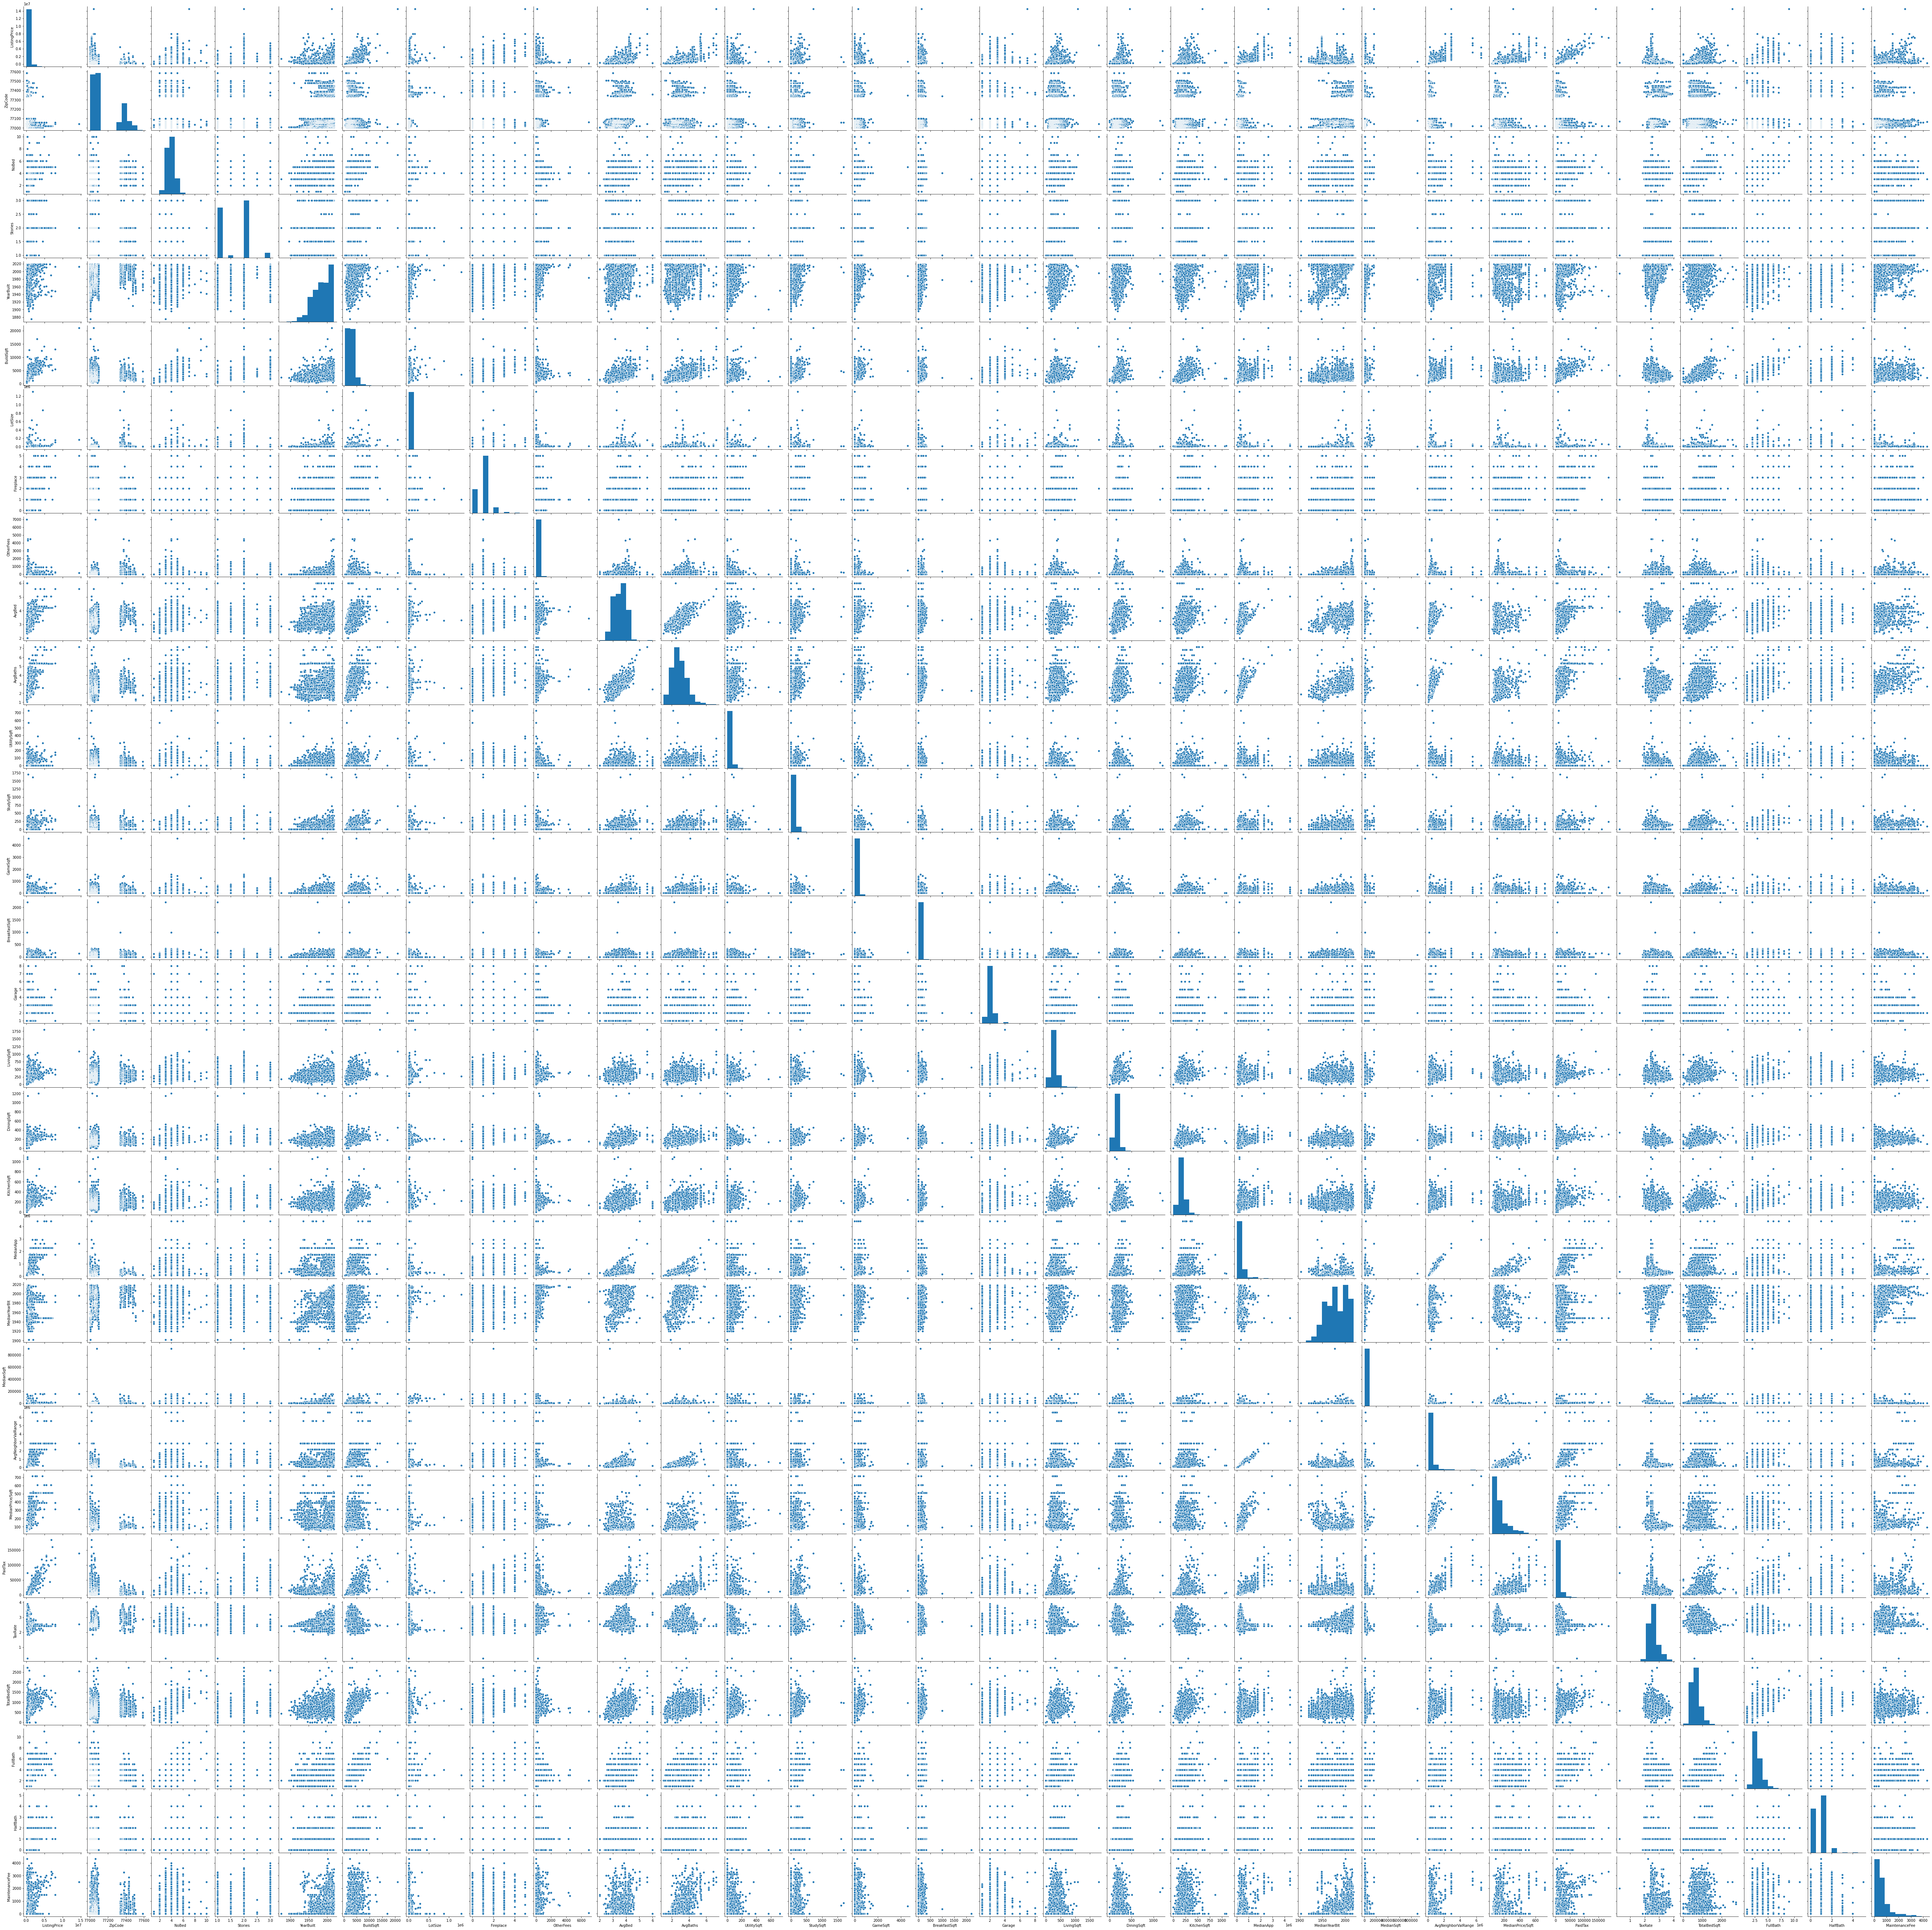

In [111]:
sns.pairplot(SingleFamilyHome)

### 2.4.1 Listing Price<a id='2.4.1_Listing_Price'></a>

In [89]:
SingleFamilyHome.ListingPrice.describe()

count    6.306000e+03
mean     5.096541e+05
std      5.980943e+05
min      2.390000e+04
25%      2.379250e+05
50%      3.390000e+05
75%      5.450000e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

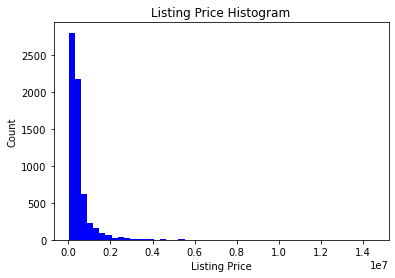

In [90]:
plt.hist(SingleFamilyHome.ListingPrice,bins=50, color='blue')
plt.xlabel('Listing Price')
plt.ylabel('Count')
plt.title('Listing Price Histogram')

plt.show()

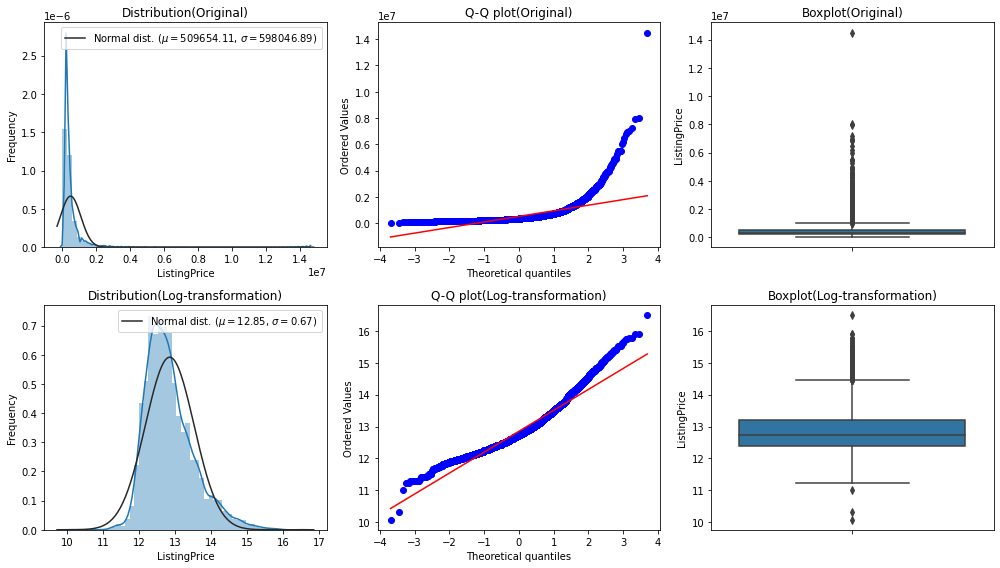

In [91]:
fig, ax = plt.subplots(2,3, figsize=(14,8))
##### Original
# histgram
sns.distplot(SingleFamilyHome['ListingPrice'] , fit=norm, ax=ax[0,0])
mu, sigma = norm.fit(SingleFamilyHome['ListingPrice'])
ax[0,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Distribution(Original)')
# Q-Q plot
_ = stats.probplot(SingleFamilyHome['ListingPrice'], plot=ax[0,1])
ax[0,1].set_title('Q-Q plot(Original)')
# plot boxplot
sns.boxplot(SingleFamilyHome['ListingPrice'] , orient='v', ax=ax[0,2])
ax[0,2].set_title('Boxplot(Original)')

##### Log-transformation
logged = np.log1p(SingleFamilyHome['ListingPrice'])
# histgram
sns.distplot(logged , fit=norm, ax=ax[1,0])
mu, sigma = norm.fit(logged)
ax[1,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Distribution(Log-transformation)')
# Q-Q plot
_ = stats.probplot(logged, plot=ax[1,1])
ax[1,1].set_title('Q-Q plot(Log-transformation)')
# plot boxplot
sns.boxplot(logged , orient='v', ax=ax[1,2])
ax[1,2].set_title('Boxplot(Log-transformation)')

fig.tight_layout()

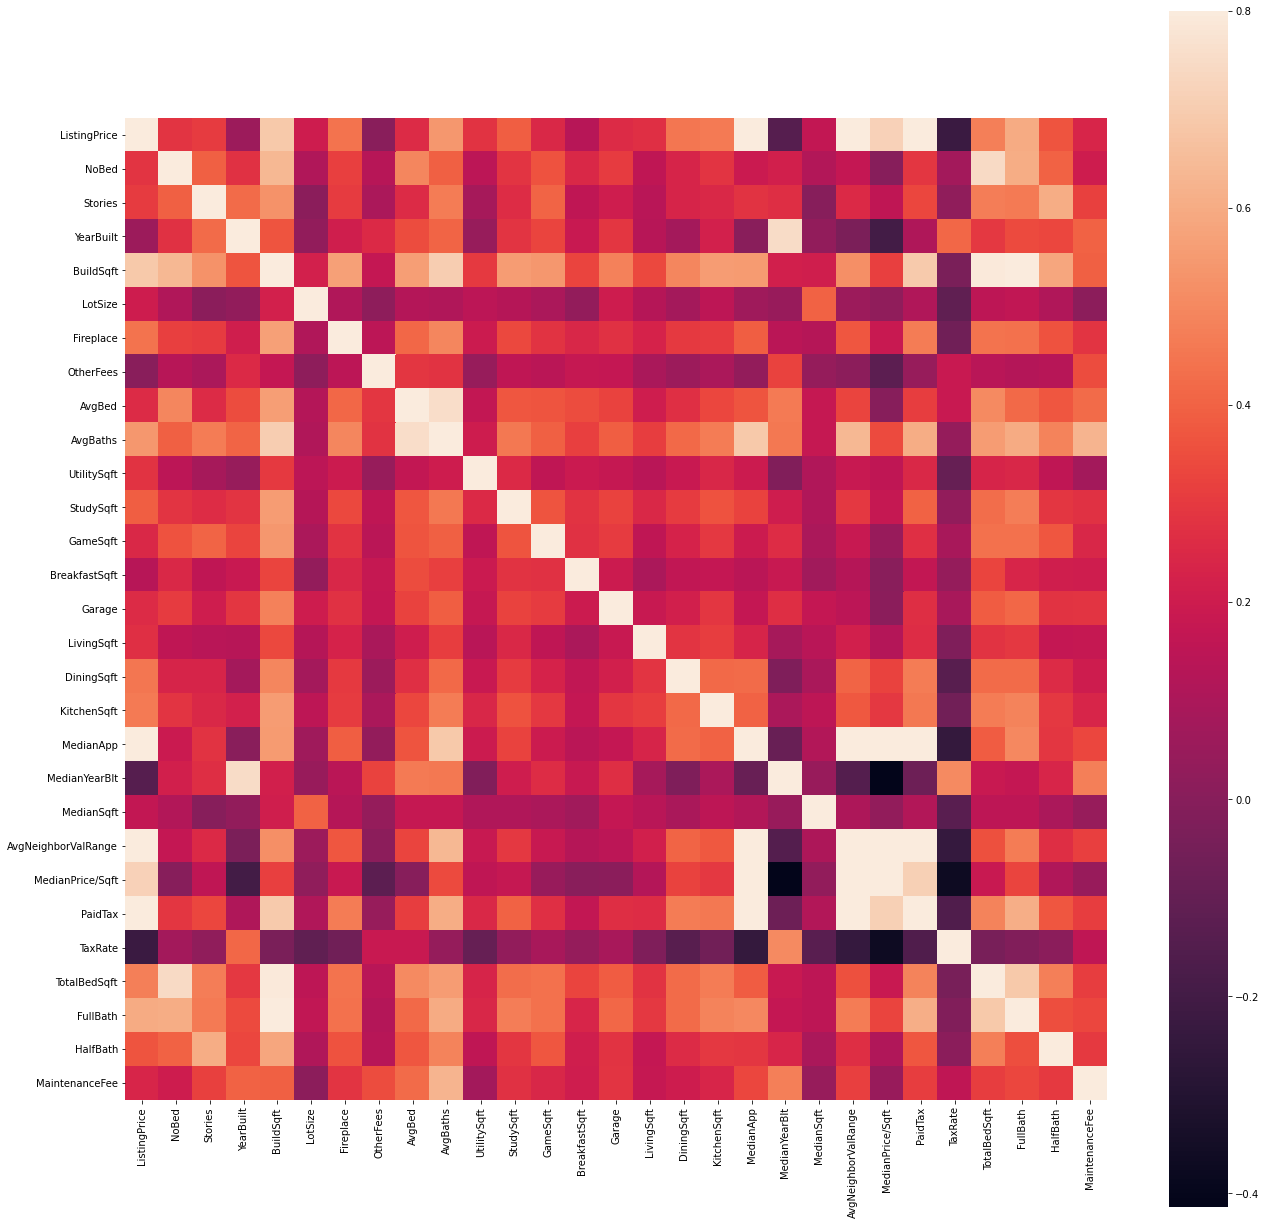

In [92]:
corr = SingleFamilyHome.select_dtypes(include=['float64', 'int64']).iloc[:,0:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [93]:
# Correlation between attributes with SalePrice
corr_list = corr['ListingPrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

PaidTax                0.915134
MedianApp              0.827783
AvgNeighborValRange    0.804089
MedianPrice/Sqft       0.715361
BuildSqft              0.690425
FullBath               0.599141
AvgBaths               0.540162
TotalBedSqft           0.474289
KitchenSqft            0.459718
DiningSqft             0.451395
Fireplace              0.442930
StudySqft              0.392130
HalfBath               0.364306
Stories                0.303974
NoBed                  0.284573
UtilitySqft            0.282491
LivingSqft             0.270486
AvgBed                 0.259559
Garage                 0.257277
GameSqft               0.247606
MaintenanceFee         0.238273
LotSize                0.200151
MedianSqft             0.169249
BreakfastSqft          0.132399
YearBuilt              0.058675
OtherFees              0.006394
MedianYearBlt         -0.142270
TaxRate               -0.225354
Name: ListingPrice, dtype: float64

Listing price is highly correlated to Median appraisal followed by neighborhood max and min range. 

In [94]:
high_correlated_features = ['MedianApp','AvgNeighborValRange','MedianPrice/Sqft','PaidTax',
                            'FullBath','BuildSqft','AvgBaths']

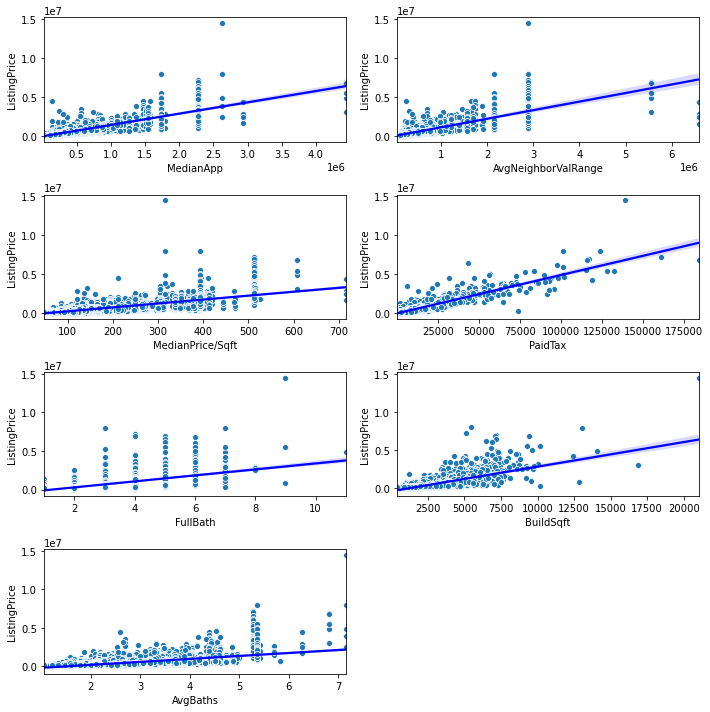

In [95]:
'''Plot appropriate graphs to comprehend the relationship'''
fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=4)
for i , var in enumerate(high_correlated_features):
    ax_i = fig.add_subplot(spec[i])
    sns.scatterplot(x=var, y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
    sns.regplot(x=var, y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')
    ax_i=plt.gca()
plt.tight_layout()
plt.show()


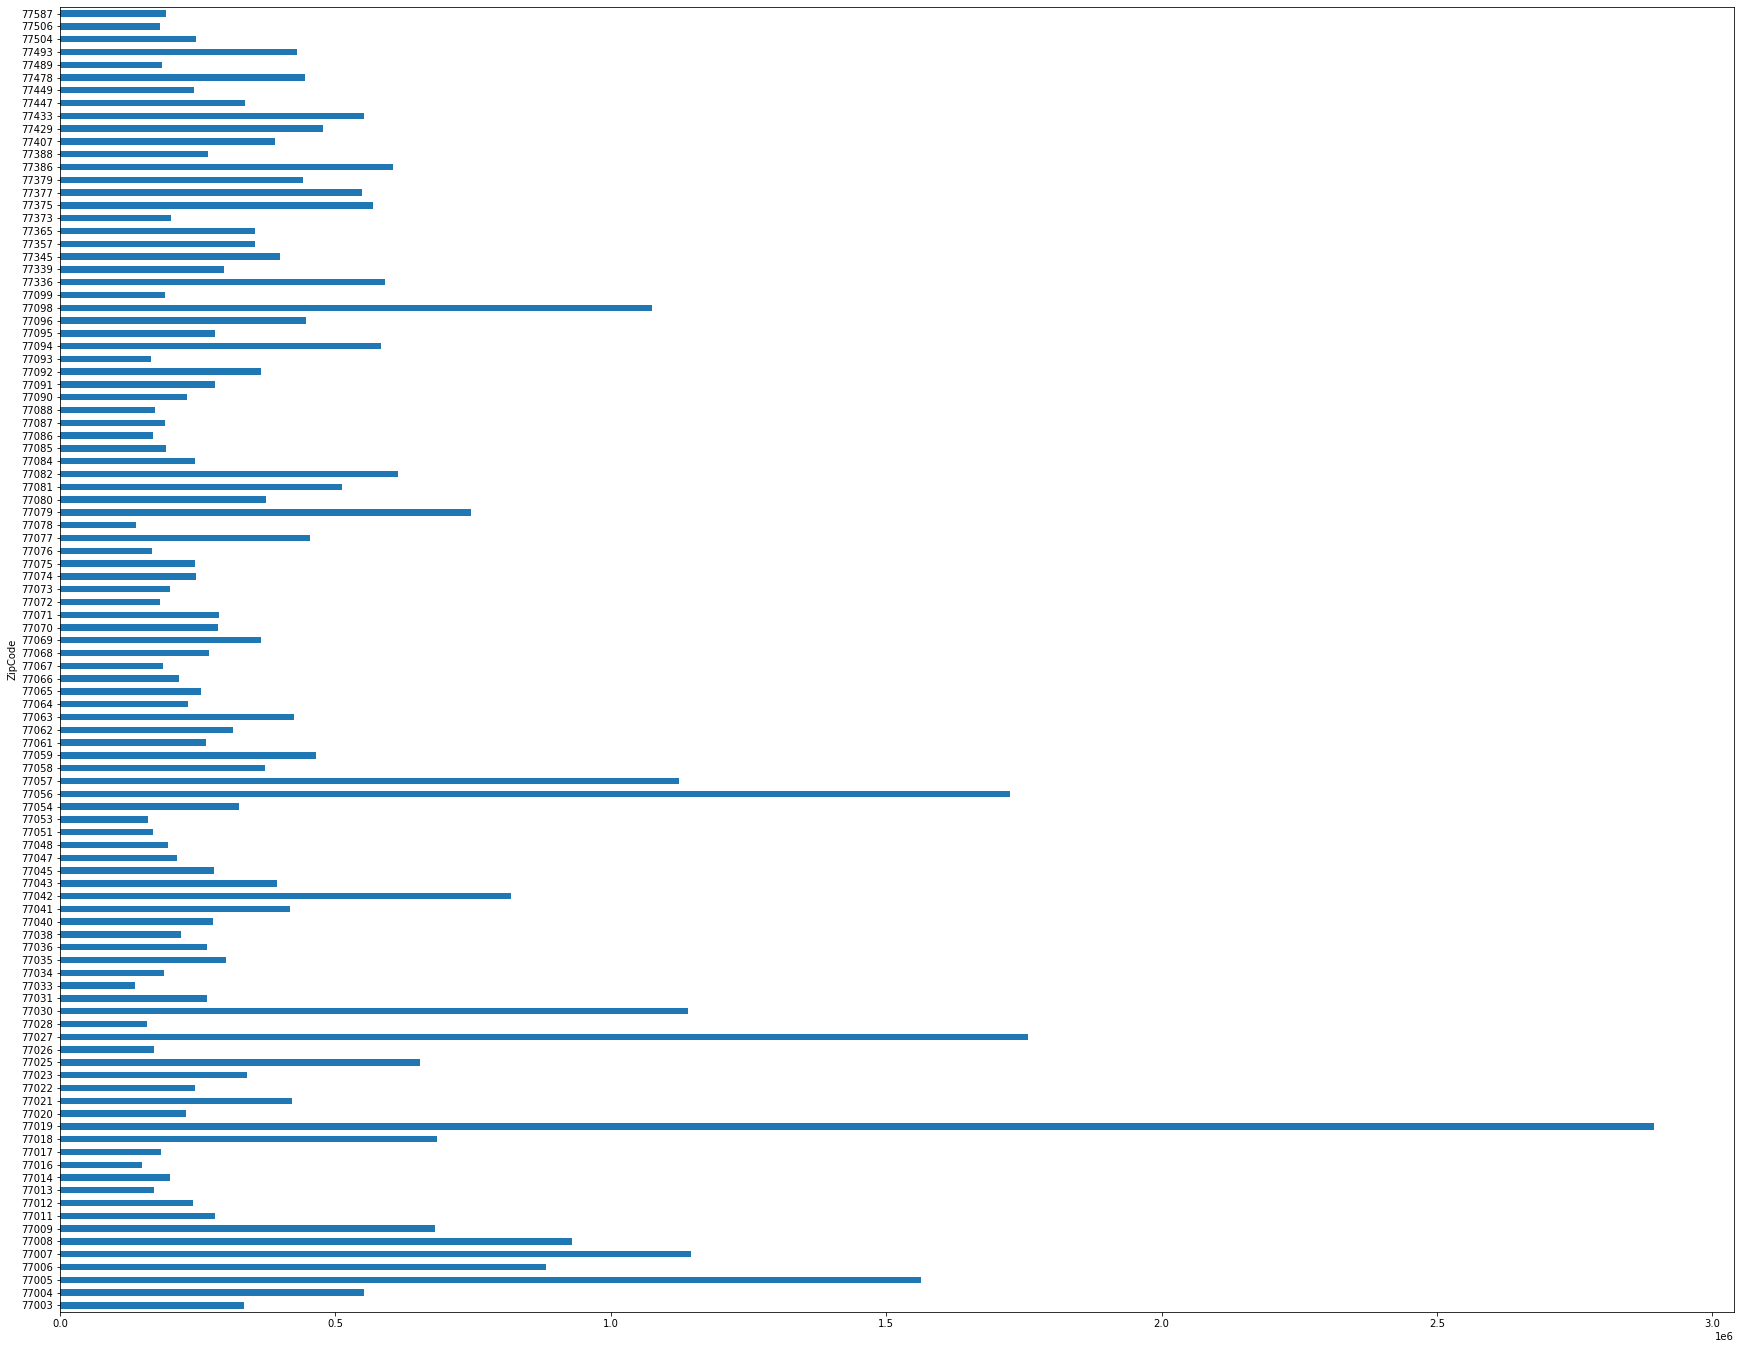

In [96]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].mean().plot(kind='barh')

Zip code 77019 has highest average price which includes one of the most expensive are in TX called `River Oak`.

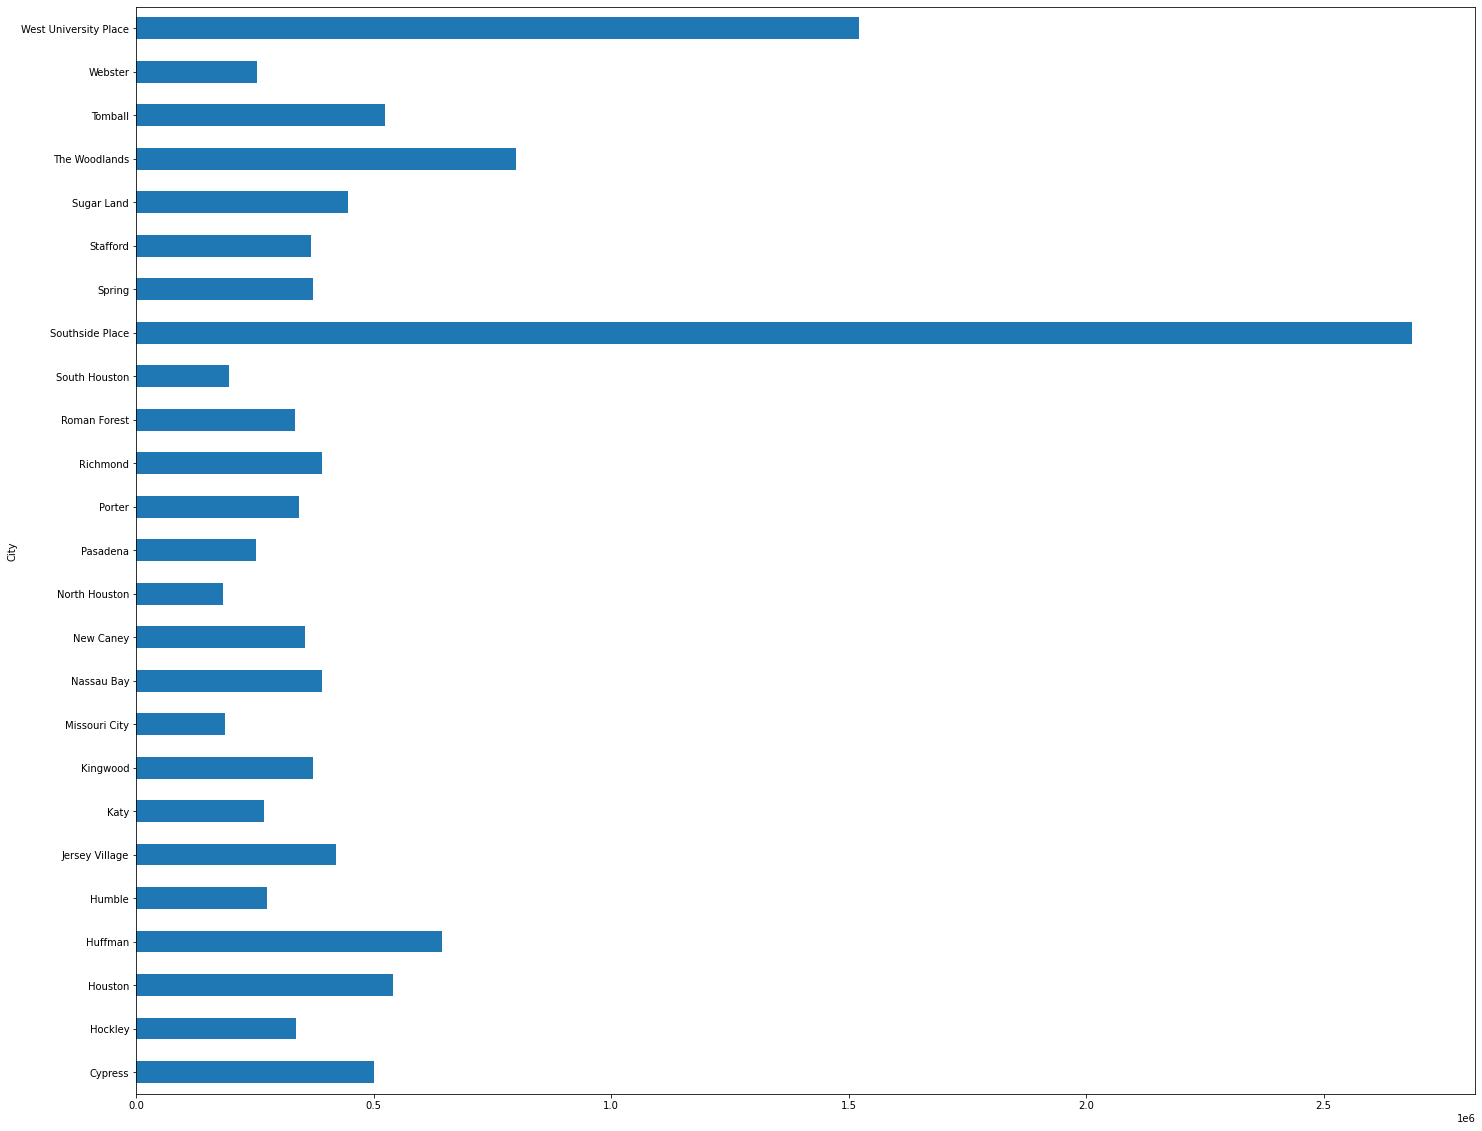

In [97]:
plt.figure(figsize=(24,20))
SingleFamilyHome.groupby('City')['ListingPrice'].mean().plot(kind='barh')

Surprisingly price average for houses in southside place is higher than other cities. lets take a look at these area:

In [98]:
SingleFamilyHome[SingleFamilyHome.City == 'Southside Place']

image_link  ListingPrice  \
49   ['https://photos.harstatic.com/189052667/hr/im...       1895000   
77   ['https://photos.harstatic.com/190418429/hr/im...       1799000   
104  ['https://photos.harstatic.com/188714913/hr/im...       2499000   
125  ['https://photos.harstatic.com/189115448/hr/im...       4549000   

                Address             City ZipCode         County  \
49   3775 Elmora Street  Southside Place   77005  Harris County   
77    6357 Edloe Street  Southside Place   77005  Harris County   
104  3759 Ingold Street  Southside Place   77005  Harris County   
125  3745 Farber Street  Southside Place   77005  Harris County   

                                    Legal  NoBed  Stories        Style  ...  \
49            LT 40 BLK 5 SOUTHSIDE PLACE      4      2.0  Traditional  ...   
77   LT 40 & TR 41A BLK 1 SOUTHSIDE PLACE      4      2.0  Traditional  ...   
104          LT 36 BLK 11 SOUTHSIDE PLACE      4      2.0  Traditional  ...   
125           LT 22 BLK 6 SOUTHSIDE PLACE      5      2.0  Traditional  ...   

     MedianYearBlt  MedianSqft  AvgNeighborValRange  MedianPrice/Sqft  \
49            1992        7750            1642500.0            410.13   
77            1992        7750            1642500.0            410.13   
104           1992        7750            1642500.0            410.13   
125           1992        7750            1642500.0            410.13   

          PaidTax   TaxRate TotalBedSqft FullBath HalfBath MaintenanceFee  
49   35411.000000  2.172400        784.0        4        1            0.0  
77   33164.000000  2.172400        826.0        3        1            0.0  
104  43861.000000  2.172400        812.0        4        2            0.0  
125  31593.444444  2.182233       1031.0        6        3            0.0  

[4 rows x 57 columns]

There are 4 houses with the price more than \\$1.5 million. 

In [99]:
SingleFamilyHome.describe()

ListingPrice        NoBed      Stories    YearBuilt     BuildSqft  \
count  6.306000e+03  6306.000000  6306.000000  6306.000000   6306.000000   
mean   5.096541e+05     3.725817     1.596337  1985.441643   2814.049794   
std    5.980943e+05     0.807080     0.568569    24.007853   1281.071176   
min    2.390000e+04     1.000000     1.000000  1875.000000    400.000000   
25%    2.379250e+05     3.000000     1.000000  1968.000000   1964.000000   
50%    3.390000e+05     4.000000     2.000000  1987.000000   2565.000000   
75%    5.450000e+05     4.000000     2.000000  2006.000000   3372.750000   
max    1.450000e+07    10.000000     3.000000  2019.000000  21032.000000   

            LotSize    Fireplace    OtherFees       AvgBed     AvgBaths  ...  \
count  6.306000e+03  6306.000000  6306.000000  6306.000000  6306.000000  ...   
mean   1.112721e+04     0.839359   152.802574     3.553338     2.887096  ...   
std    2.802390e+04     0.644660   240.623713     0.467351     0.834983  ...   
min    1.104000e+03     0.000000     0.000000     2.020000     1.060000  ...   
25%    6.550000e+03     0.000000     0.000000     3.170000     2.292500  ...   
50%    8.165500e+03     1.000000   101.500000     3.570000     2.760000  ...   
75%    9.974500e+03     1.000000   250.000000     3.910000     3.390000  ...   
max    1.306800e+06     5.000000  7000.000000     6.000000     7.150000  ...   

       MedianYearBlt     MedianSqft  AvgNeighborValRange  MedianPrice/Sqft  \
count    6306.000000    6306.000000         6.306000e+03       6306.000000   
mean     1981.754678    9539.961941         4.010467e+05        150.395163   
std        23.280565   15022.793093         4.386906e+05         85.202495   
min      1902.000000    1375.000000         4.700000e+04         48.120000   
25%      1963.250000    6600.000000         1.885000e+05         97.390000   
50%      1982.000000    7975.000000         2.780000e+05        116.160000   
75%      2003.000000    9375.000000         4.540000e+05        164.530000   
max      2019.000000  903156.000000         6.587000e+06        715.670000   

             PaidTax      TaxRate  TotalBedSqft     FullBath     HalfBath  \
count    6306.000000  6306.000000   6306.000000  6306.000000  6306.000000   
mean    10480.975334     2.634078    656.775645     2.547732     0.636378   
std     11107.513413     0.302255    237.154254     0.925293     0.589522   
min       282.000000     0.245000      3.000000     1.000000     0.000000   
25%      5055.000000     2.421600    491.000000     2.000000     0.000000   
50%      7518.000000     2.536600    627.000000     2.000000     1.000000   
75%     11621.750000     2.763200    775.000000     3.000000     1.000000   
max    183920.000000     3.902600   2725.000000    11.000000     5.000000   

       MaintenanceFee  
count     6306.000000  
mean       572.690771  
std        638.395977  
min          0.000000  
25%          0.000000  
50%        450.000000  
75%        760.000000  
max       4320.000000  

[8 rows x 29 columns]

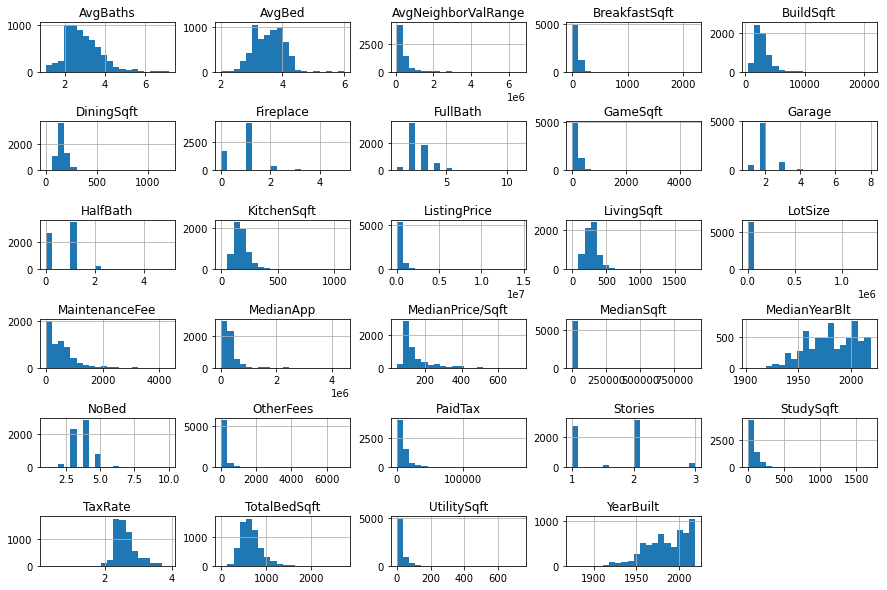

In [100]:
SingleFamilyHome.hist(figsize=(15,10),bins=20)
plt.subplots_adjust(hspace=1)

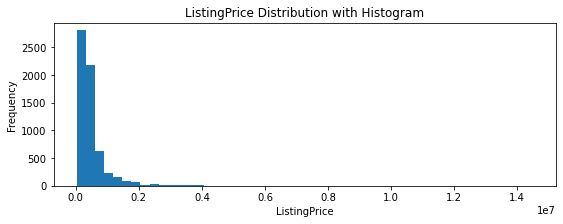

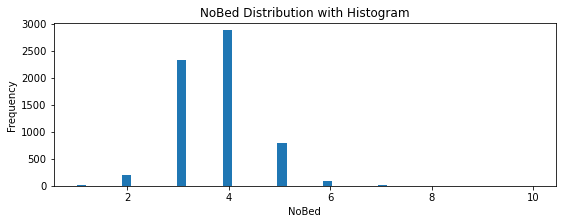

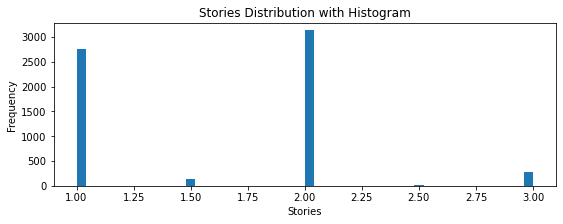

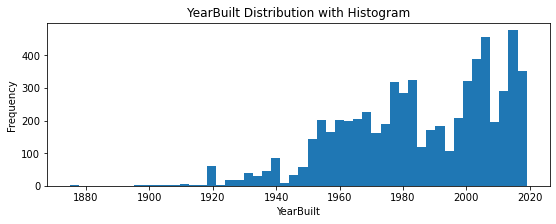

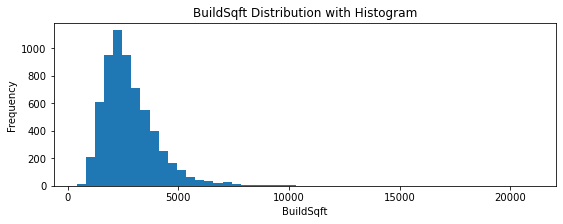

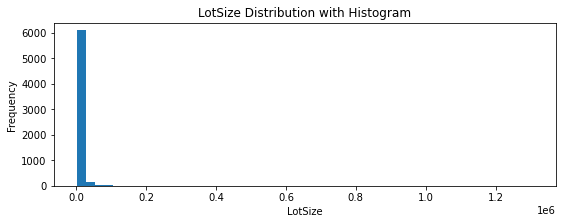

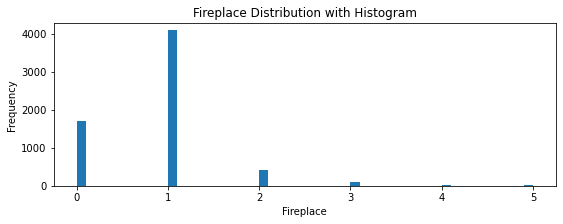

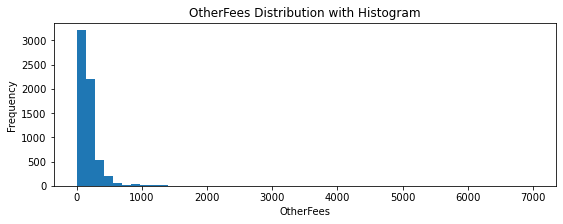

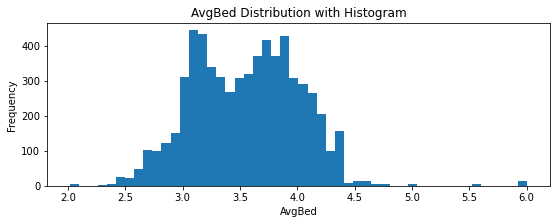

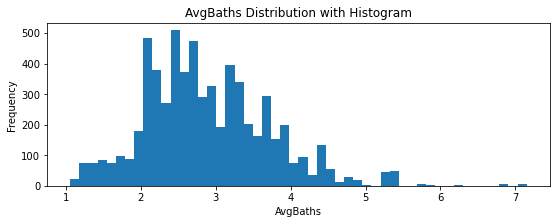

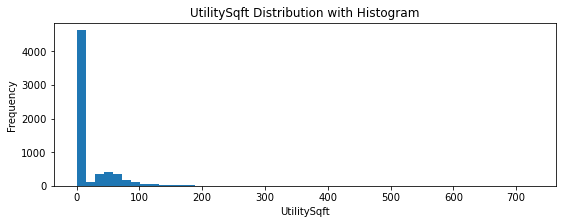

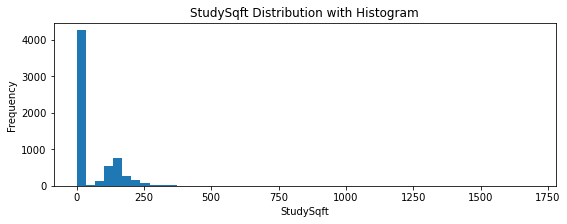

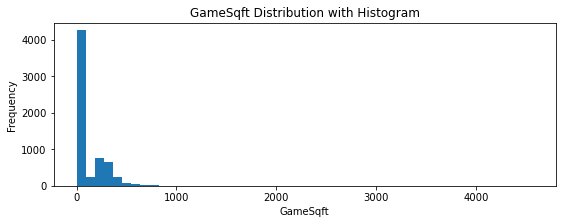

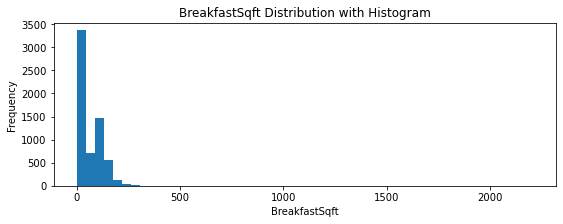

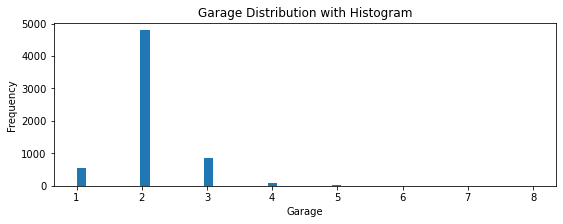

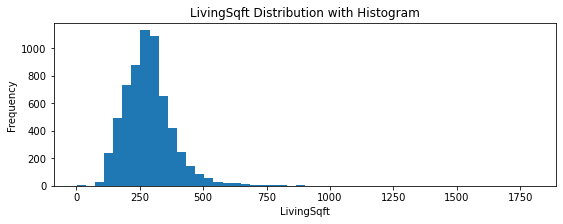

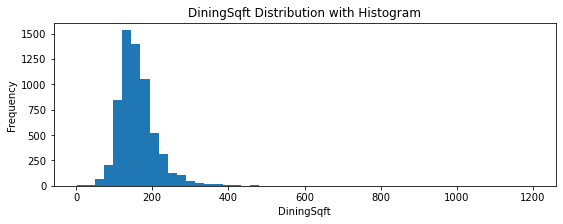

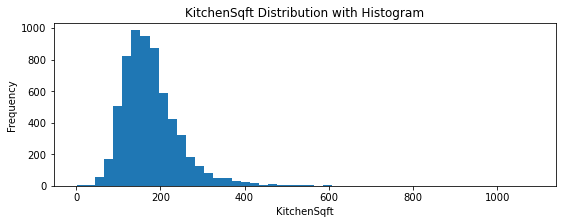

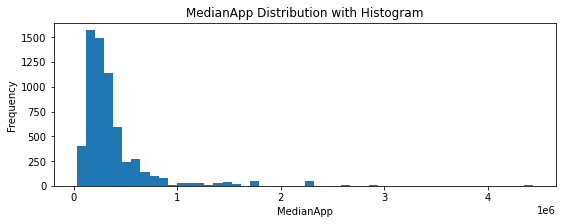

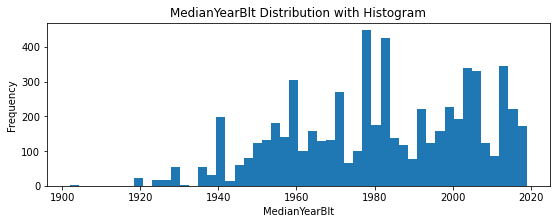

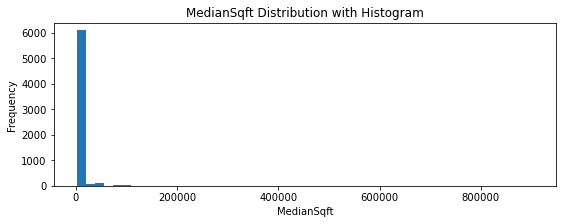

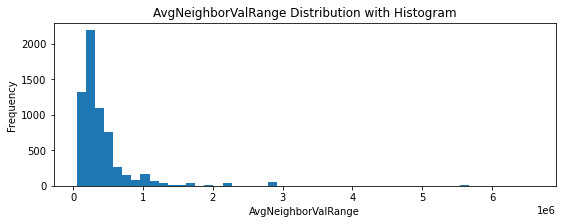

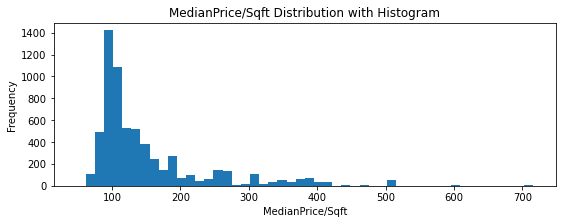

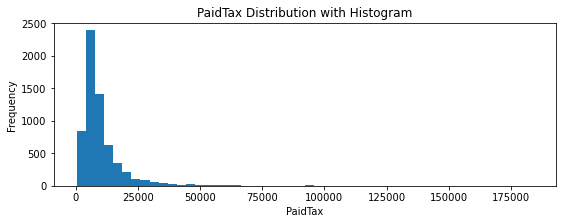

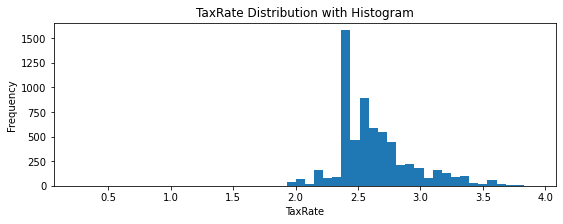

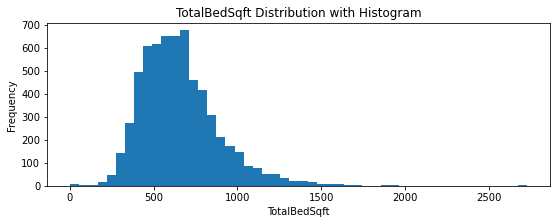

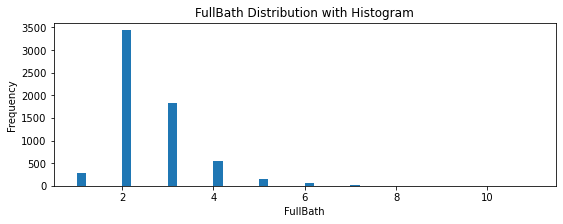

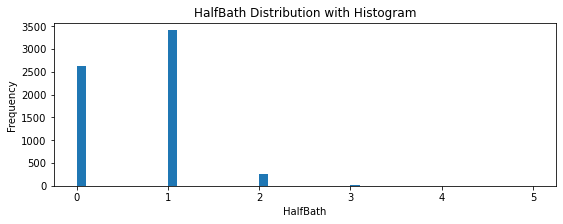

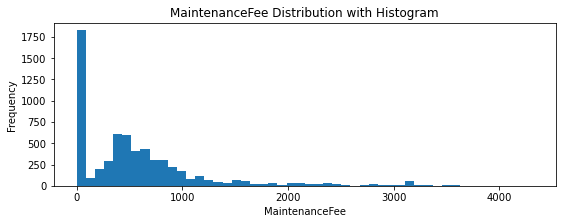

In [101]:
def plot_hist(variable):
    """This function craets histogram for passed in variabled"""
    plt.figure(figsize=(9,3))
    plt.hist(SingleFamilyHome[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
for i in numerical:
    plot_hist(i)

### 2.4.2 Year Build<a id='2.4.2_Year_Build'></a>

In [102]:
SingleFamilyHome.YearBuilt.describe()

count    6306.000000
mean     1985.441643
std        24.007853
min      1875.000000
25%      1968.000000
50%      1987.000000
75%      2006.000000
max      2019.000000
Name: YearBuilt, dtype: float64

In [103]:
SingleFamilyHome.YearBuilt.value_counts()

2015    180
2005    166
2006    165
2014    163
1955    146
       ... 
1922      1
1908      1
1904      1
1900      1
1896      1
Name: YearBuilt, Length: 109, dtype: int64

Text(0.5, 1.0, 'Year Build Histogram')

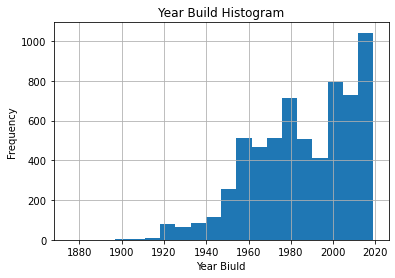

In [104]:
SingleFamilyHome.YearBuilt.hist(bins=20)
plt.xlabel('Year Biuld')
plt.ylabel('Frequency')
plt.title('Year Build Histogram')

Text(0.5, 1.0, 'Scatter Plot for Listing Price vs Year Biult')

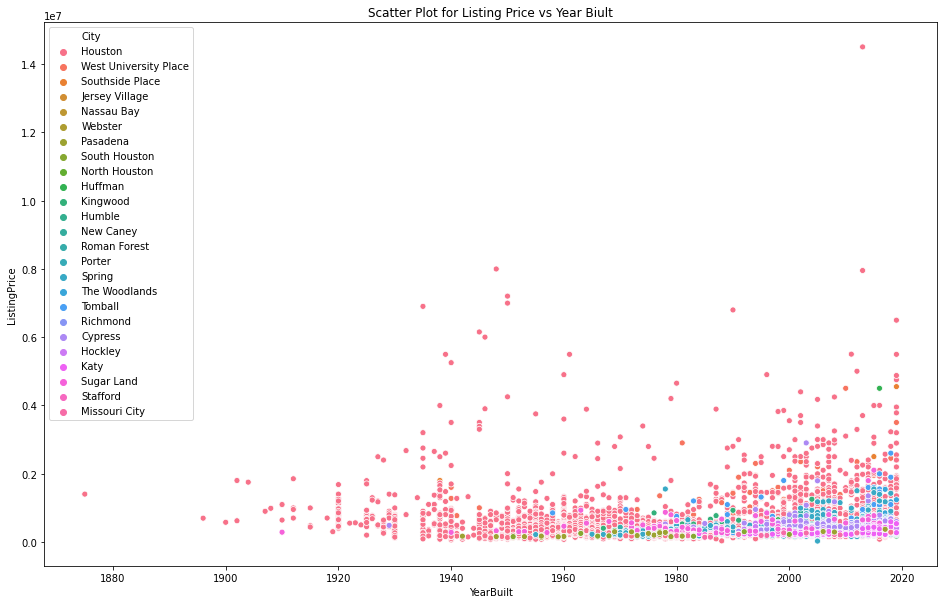

In [105]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='YearBuilt', y='ListingPrice', data=SingleFamilyHome,hue='City')
plt.title('Scatter Plot for Listing Price vs Year Biult')

Except for some houses with high price built between 1940 and 1960 house price is going up for the ones built between 2000 and 2020.

### 2.4.3 Median Year Built<a id='2.4.3_Median_Build'></a>

### 2.4.2 Tax Rate<a id='2.4.2_Tax_Rate'></a>

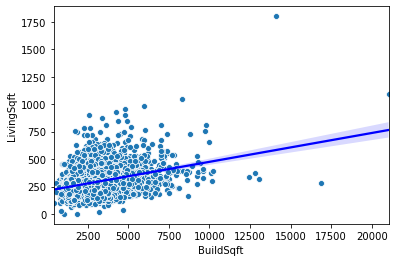

In [106]:
sns.scatterplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, scatter=False, color='b')

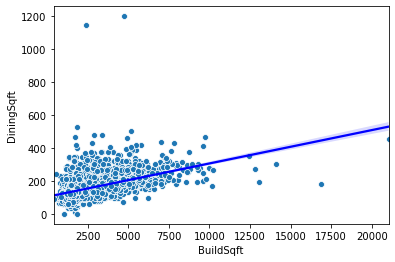

In [107]:
sns.scatterplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, scatter=False, color='b')

In [108]:
SingleFamilyHome[SingleFamilyHome.DiningSqft>400][['Address','BuildSqft','DiningSqft','LivingSqft']]

Address  BuildSqft  DiningSqft   LivingSqft
101          2616 Quenby Avenue       5775       420.0   440.000000
283           244 Malone Street       3361       480.0   870.000000
1059         3429 Ella Lee Lane       4741      1200.0   551.000000
1362     9302 Sharpcrest Street       1780       420.0   120.000000
1579    10219 Cedar Creek Drive       2765       432.0   301.968130
1602       6 W Rivercrest Drive      21032       456.0  1088.000000
1887         5514 Russett Drive       9598       414.0   395.535245
1891    5360 Spring Park Street       5140       504.0   285.000000
1961     6063 Crab Orchard Road       7843       432.0   540.000000
1962       5737 Bayou Glen Road       7022       440.0   440.000000
2888        9303 Bintliff Drive       1837       528.0   221.000000
3020   1319 Mission Chase Drive       2388      1145.6   306.125000
3353       41 Rollingwood Drive       2908       480.0   238.000000
4121       9203 Cliffwood Drive       9697       468.0   754.000000
4330       1752 North Boulevard       5454       420.0   620.000000
4700    4619 Breezy Point Drive       4929       462.0   476.000000
5845  15711 Uvalde Springs Lane       5149       405.0   275.625000
6089           22106 Vobe Court       3893       408.0   273.571429
6180         2411 Gunston Court       1737       468.0   270.000000

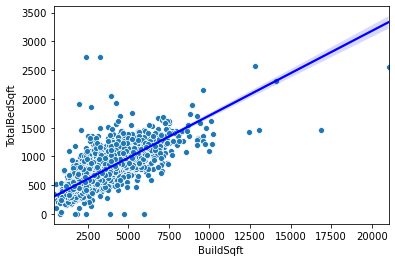

In [109]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')

In [110]:
SingleFamilyHome[SingleFamilyHome.TotalBedSqft>2000][['Address','BuildSqft','TotalBedSqft']]

Address  BuildSqft  TotalBedSqft
1602     6 W Rivercrest Drive      21032   2549.000000
1604    27 E Rivercrest Drive      14094   2311.541667
1617  10043 Cedar Creek Drive       3935   2056.000000
2740          7919 Albin Lane       9584   2160.000000
3600       4615 Twisting Road       2360   2725.000000
3754    1802 Castlerock Drive      12821   2571.466667
5832   12023 Via Palazzo Lane       3239   2719.000000